# Titanic Project



### Problem Statement:
    


The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


### About the dataset

From the dataset we can assume the following things:

Survived: 

No=0  and Yes=1

Pclass=Passenger's class: 

1 = Upper class, 2 = Middle class, 3 = Lower class

SibSp:

It indicates the passenger's relation with siblings and Spouse.

Parch: 

It indicates the passenger's relation with parents.

Embarked: 

The ports of embarkations are C = Cherbourg, Q = Queenstown and S = Southampton.

### Importing neccesseary Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset using pandas :

In [3]:
# Reading the csv file from dataset
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


The dataset contains 12 columns which contains both numerical and categorical data types. Out of 12 columns 11 are independent(predictor) variables and remaining one "Survived" is the dependent(target) variable. We can also see that Ticket column contains both numeric and alphanumeric data type and Cabin also contains alphanumeric data type.

Also the target variable contains whether the passengers are survived or died which is labelled as 1 = Yes and 0 = No.

Here PassengerId is taken on the basis of index so we can drop that column. 

We will drop this column after checking correlation with the target variable.



In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The dataset contains both numerical and categorical data which are mentioned below.

Categorical features: In the dataset Survived, Sex and Embarked have categorical data also Pclass has the ordinal data.

Numerical features: Here Age and Fare are continuous data, SibSp and Parch are discrete data.

### Exploration of the Dataset(EDA)

In [4]:
# Checking dimensions
df.shape

(891, 12)

In [5]:
# Checking type of the dataset
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# Getting overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Shows the number of unique values in each column.


### Checking null values:

In [8]:
# Checking null values in the dataframe
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here in Age, Cabin and Embarked null values are present.

### Visualisation of  missing data

<AxesSubplot:>

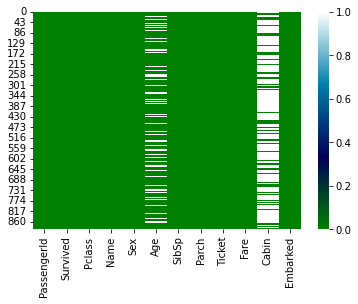

In [10]:
sns.heatmap(df.isnull(), cmap='ocean')

In [11]:
# Checking the uniqueness of dataset
df['Survived'].unique()

array([0, 1], dtype=int64)

This gives the unique occurrence in the target variable. As we can see in the label there are two unique values that is 0 = No and 1 = Yes and this target variable has integer datatype.

In [12]:
# Checking count of number of survivors 
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

It shows 549 people were dead and 342 managed to survive


In [13]:
# Checking wheather the dataset contains any space
df.loc[df['Survived']==" "]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


There are no spaces present in the dataset. 

### Description 

In [14]:
# Statistical summary of dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present.

In the above description the mean of survived column is 0.38, but we cannot conclude on this basis since the dataset is not complete and Age column has count 714 which means there are some missing values in the dataset. We can also see the passenger's minimum age as 0.42 (which means a 4 months baby) years and maximum age is 80 years also the mean age is 29 years.

In the column Fare we can see somebody paid 512 dollars which is maximum amount and zero is the min. 

Columns like Name, Sex, Ticket, Cabin and Embarked are not included in the describe method as they have object datatype. In the describe method we get only continuous data information.

In summarizing the data we can also observe that the dataset seems to be having more outliers as well as skewness in the data. The column Age and Fare has huge outliers from the max of 80 and 512 respectively which is quite far from their mean with their second quantile median(50%).



### Data Visualization

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

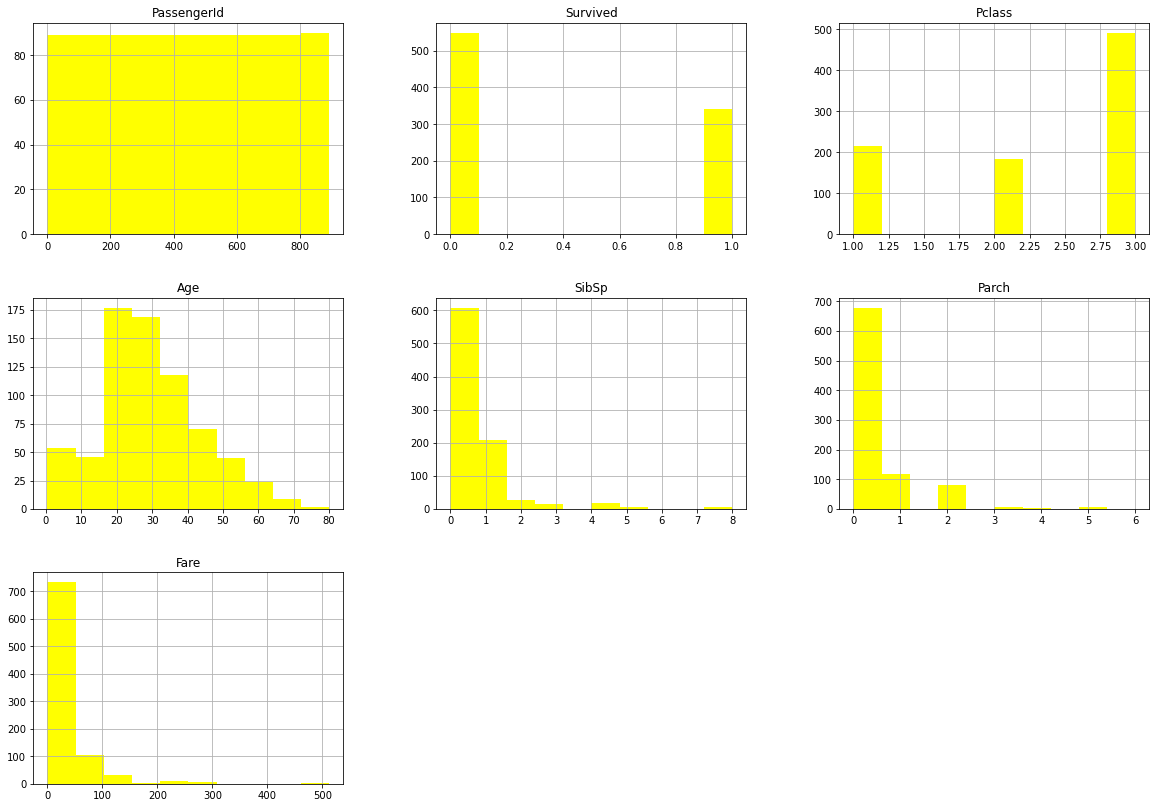

In [16]:
df.hist(figsize=(20,14), color ='yellow')

# some  simple  anaylsis   on the  dataset

Representation via Histogram

### Univariate Analysis

0    549
1    342
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

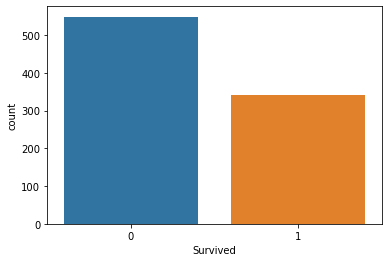

In [4]:
#Visualize the count of survivors
print(df["Survived"].value_counts())
sns.countplot(df["Survived"])

The label Survived has two classes 0 and 1. According to the graph passengers survived in this disaster are very less. 
There is imbalanced data. 
Before building our machine learning models, since it is our target variable so we need to treat this class imbalancing issue using oversampling or downsamplimg 

3    491
1    216
2    184
Name: Pclass, dtype: int64


<AxesSubplot:xlabel='Pclass', ylabel='count'>

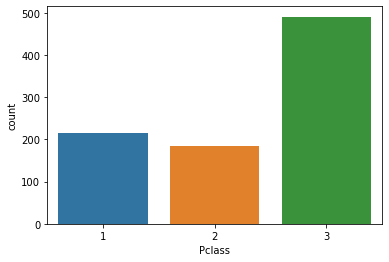

In [5]:
# Checking count of survival rate in the passenger class
print(df["Pclass"].value_counts())
sns.countplot(df["Pclass"])

male      577
female    314
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

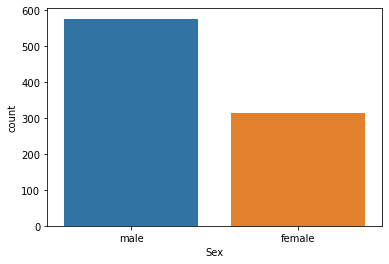

In [6]:
# Checking counts for Sex feature
print(df["Sex"].value_counts())
sns.countplot(df["Sex"])

S    644
C    168
Q     77
Name: Embarked, dtype: int64


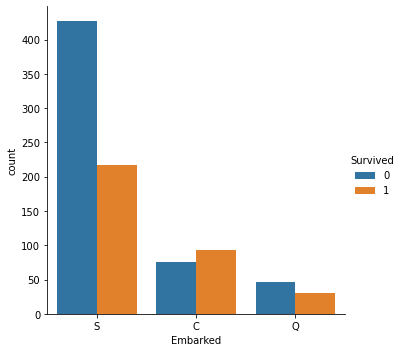

In [7]:
# Checking count in the Embarkation
print(df["Embarked"].value_counts())
sns.factorplot('Embarked',kind='count',data=df,hue='Survived')

### Bivariate Analysis

<AxesSubplot:title={'center':'Comparision between Pclass and Age'}, xlabel='Pclass', ylabel='Age'>

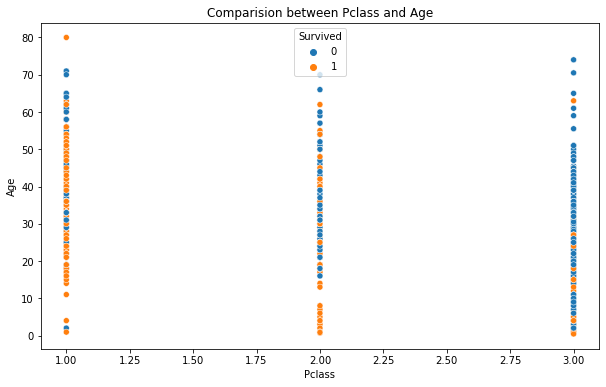

In [8]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparision between Pclass and Age')
sns.scatterplot(df['Pclass'],df['Age'],hue=df["Survived"])

<AxesSubplot:title={'center':'Comparision between Pclass and Sex'}, xlabel='Pclass', ylabel='Sex'>

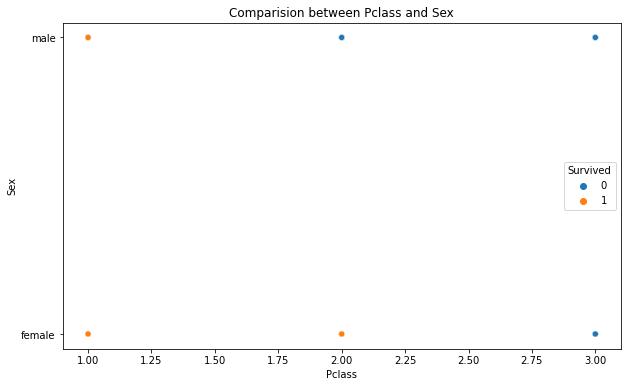

In [9]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Pclass and Sex')
sns.scatterplot(df['Pclass'],df['Sex'],hue=df["Survived"])

<AxesSubplot:title={'center':'Comparision between Age and Embarked'}, xlabel='Embarked', ylabel='Age'>

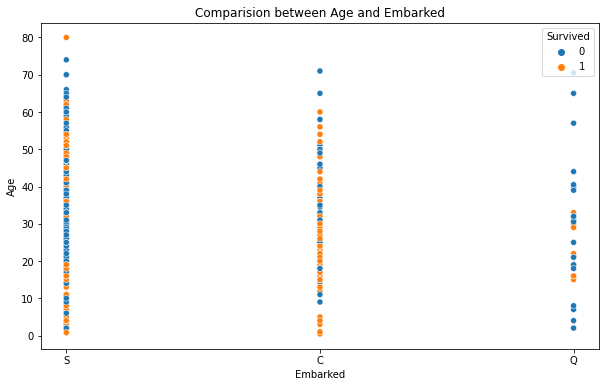

In [10]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparision between Age and Embarked')
sns.scatterplot(df['Embarked'],df['Age'],hue=df["Survived"])

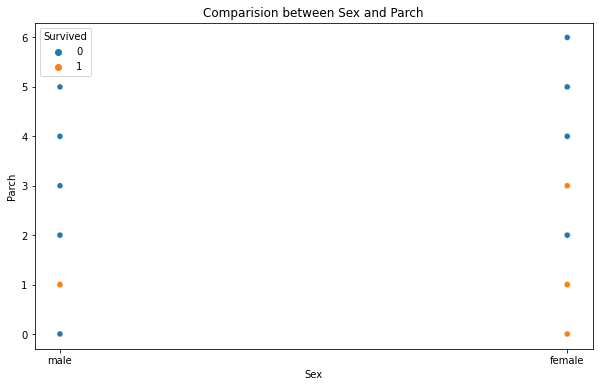

In [11]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparision between Sex and Parch')
sns.scatterplot(df['Sex'],df['Parch'],hue=df["Survived"]);

<AxesSubplot:title={'center':'Comparision between Age and Fare'}, xlabel='Age', ylabel='Fare'>

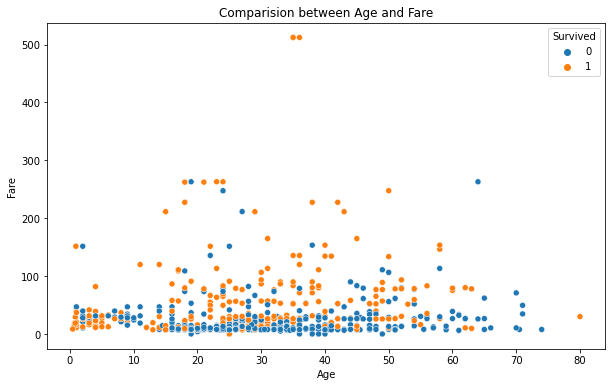

In [12]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparision between Age and Fare')
sns.scatterplot(df['Age'],df['Fare'],hue=df["Survived"])

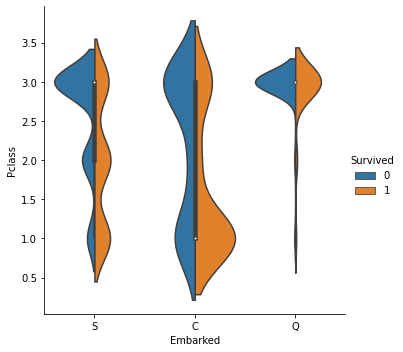

In [13]:
# Let's plot catplot for Embarked and Pclass
sns.catplot(x = "Embarked", y = "Pclass", hue = "Survived", kind = "violin", data=df, split=True)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

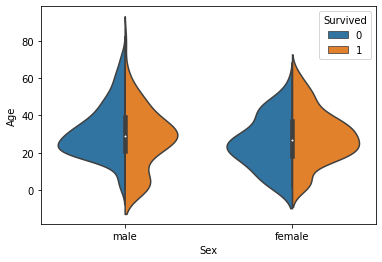

In [14]:
# Let's plot violinplot for Age and Sex
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, split=True)

### Multivariate Analysis

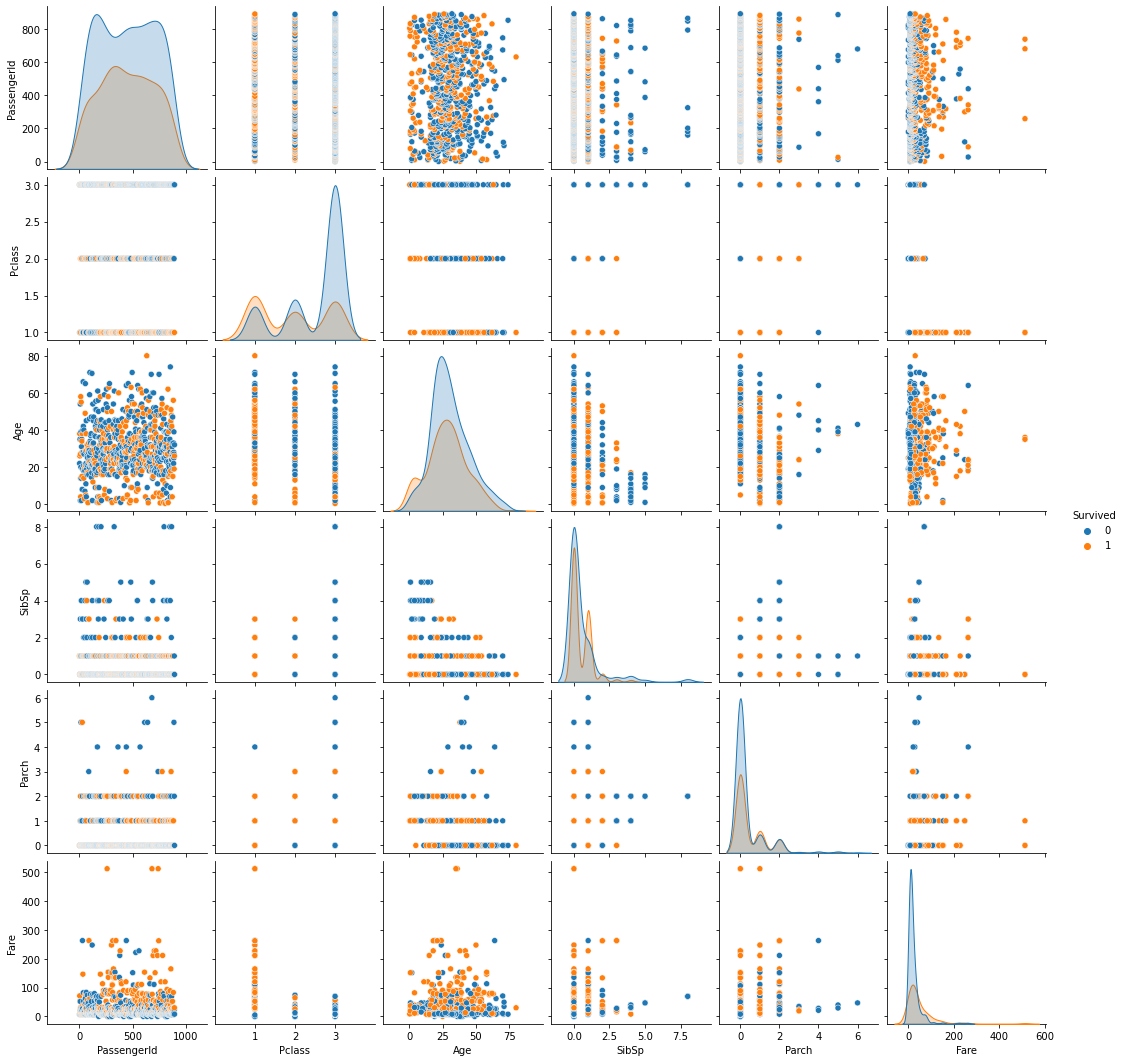

In [15]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="Survived")

### Correlation by Heatmap

In [16]:
cor = df.corr()
cor

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


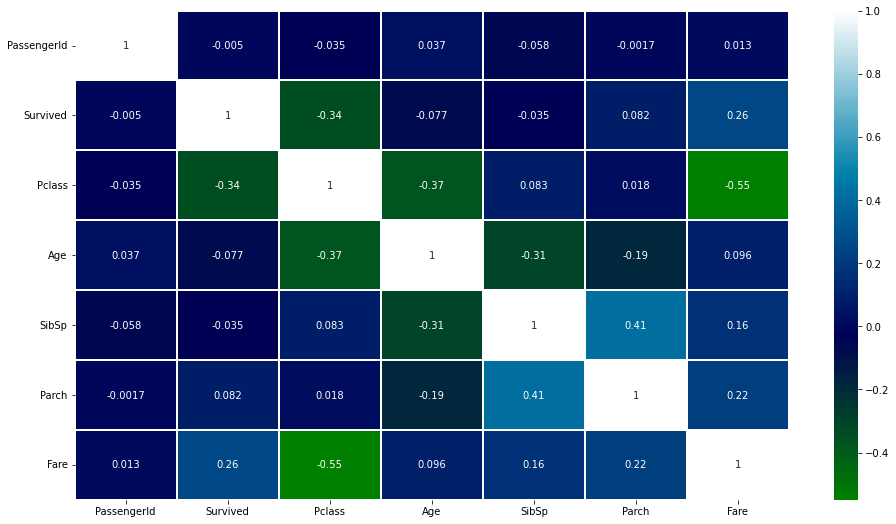

In [17]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),linewidths=.1, annot = True, cmap='ocean')
plt.yticks(rotation=0);

This heat map contains both positive and negative correlation.

We can observe that the feature column Parch and Fare are positively correlated with the target variable "Survived". Pclass is highly negatively correlated with the target variable "Survived". Also the columns SibSp, Age and PassengerId are negatively correlated with the label. The feature columns SibSp and Parch are positively correlated with each other. Light shades are highly correlated. Dark shades are less correlated. Also there are some independent variables which shows highly negative correlattion between each other. So we can check the multicollinearity problem using VIF if necessary.

Text(0.5, 1.0, 'correlation with target variable')

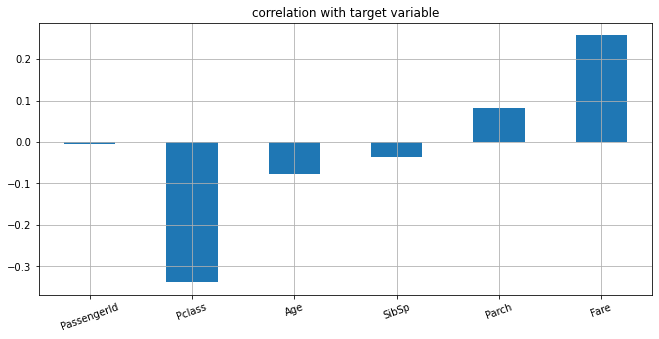

In [18]:
plt.figure(figsize=(11,5))
df.drop('Survived',axis=1).corrwith(df['Survived']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title('correlation with target variable')

Positively correlated

Fare
Parch

Negatively correlated

PassengerId
SibSp
Age
Pclass

Here we can easily observe the correlation.

From the heat map we can also observe that the PassengerId column has no relation with the target variable, so we can drop that column.



### Dropping irrelevant column

In [ ]:
# Dropping PassengerId column
df.drop('PassengerId', axis=1, inplace = True )
df.drop('Name',axis=1, inplace=True)   # Name has no important to build our madel

In [25]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


The dataframe after removing PassengerId column.

As we have seen in the statistical summary and pair plot, some columns contains outliers. 

Identifying outliers by plotting boxplot.

### Identifying the outliers

Survived        AxesSubplot(0.125,0.71587;0.168478x0.16413)
Pclass       AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Age          AxesSubplot(0.529348,0.71587;0.168478x0.16413)
SibSp        AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Parch          AxesSubplot(0.125,0.518913;0.168478x0.16413)
Fare        AxesSubplot(0.327174,0.518913;0.168478x0.16413)
dtype: object

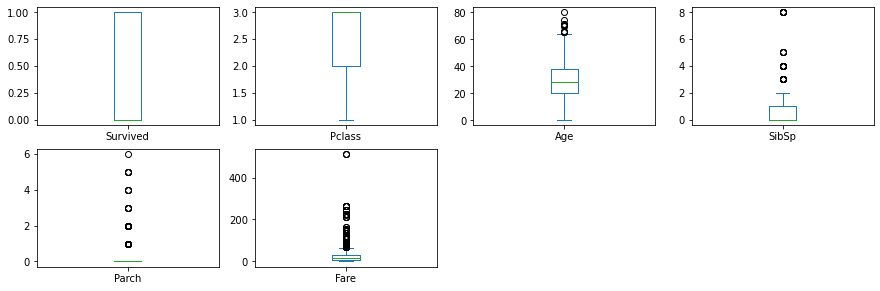

In [26]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(15,10))

Outliers are present in Age, Fare, SibSp and Parch.outliers in the features SibSp and Parch will not be removed since they are descrete data type. 

But removal of outliers in Age and Fare are must because they are continuous data.

### Data Cleaning and preprocessing

### Treating the Missing Values in the dataset

In [27]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Let's treat the features Age, Cabin and Embarked which contains null values. Since the Age column is important, the missing values need to be filled.

Age is a numerical column and has outliers so I will use median method to fill the missing values.
Embarked is a categorical column so we can make use of mode methods to fill the missing values
Cabin column has alphanumerical values and has plenty of missing values so we can't use mean, media or mode method to fill them. So we can either delete that column or we can fill that out with unknown values by using fillna() method.

### fillna technique to impute the missing values

In [28]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [29]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df['Cabin'] = df['Cabin'].fillna('U')

In [30]:
#Chcking null values after filling them
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

<AxesSubplot:>

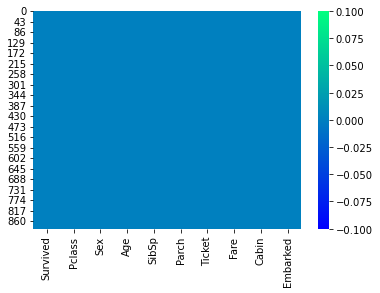

In [31]:
# Visualizing the missing value after treating it using heat map.
sns.heatmap(df.isnull(), cmap='winter')

There are no null values exists and now our data is cleaned.

### Removing Outliers 

#### 1. Zscore method using Scipy

In [32]:
# Continuous features having outliers 
variables = df[['Age','Fare']]

AGE and Fare have maximum outliers

In [34]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(variables))
# Creating new dataframe
new_df = df[(z<3).all(axis=1)]
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,U,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,U,S


In [35]:
print(df.shape)
print(new_df.shape)

(891, 10)
(864, 10)


 original dataframe = 891 rows and 10 columns. 
The new dataframe = 864 rows and 10 columns.

### Percent Data loss

In [36]:
# Let's check the the data loss
data_loss = (891-864)/891*100
data_loss

3.0303030303030303

Data lost is only 3.1% which is acceptable

### 2. IQR (Inter Quantile Range) method

In [37]:
# 1st quantile
Q1=variables.quantile(0.25)

# 3rd quantile
Q3=variables.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [38]:
print(df.shape)
print(df1.shape)

(891, 10)
(721, 10)


In [40]:
# Let's check the the data loss
data_loss = (891-721)/891*100
data_loss

19.07968574635241

 Data lost is 19% which is not aceeptable.  Hence use Z-score method

### Checking for the skewness:

In [41]:
# Checking the skewness
new_df.skew()

Survived    0.502011
Pclass     -0.708375
Age         0.321096
SibSp       3.751753
Parch       2.840412
Fare        2.257178
dtype: float64

Skewness present in = Pclass, SibSp, Parch and Fare has skewness. 

Pclass is categorical column so we should not remove skewness. 

Skewness in Age, SibSp, Parch and Fare which contains numerical data will be removed.

### Removing Skewness using power transform method

In [42]:
skewed= ["SibSp","Parch","Fare"]

In [43]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [45]:
new_df[skewed] = scaler.fit_transform(new_df[skewed].values)
new_df[skewed].head()

,SibSp,Parch,Fare
0,1.374574,-0.548637,-0.882769
1,1.374574,-0.548637,1.529038
2,-0.680931,-0.548637,-0.792444
3,1.374574,-0.548637,1.216581
4,-0.680931,-0.548637,-0.776493


### Normal distributions after removing the skewness

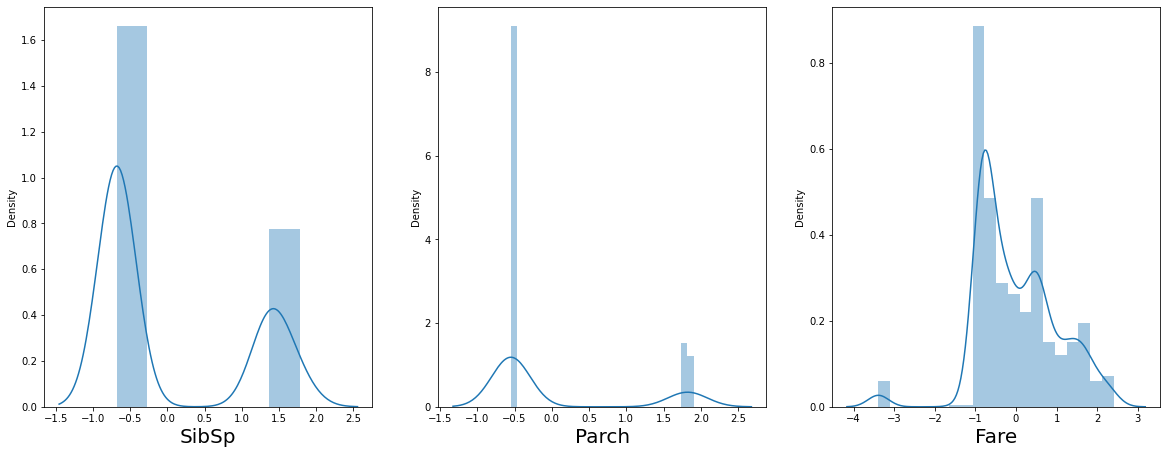

In [49]:
# After removing let's the data distribution in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df[skewed]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [50]:
# Now let's check the skewness
new_df.skew()

Survived    0.502011
Pclass     -0.708375
Age         0.321096
SibSp       0.805038
Parch       1.277888
Fare       -0.009095
dtype: float64

Skewness in the data is reduced as compared to earlier

### Encoding the data ->> Label Encoding

In [51]:
cols = ["Sex", "Ticket", "Cabin", "Embarked"]

In [52]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[cols]= new_df[cols].apply(LE.fit_transform)

In [53]:
new_df[cols].head()

,Sex,Ticket,Cabin,Embarked
0,1,517,135,2
1,0,587,70,0
2,0,655,135,2
3,0,48,48,2
4,1,466,135,2


catagorical data has been converted into the numerical data. Here we can see the unique value counts of all the encoded columns.

In [54]:
# Dataset after cleaning and encoding
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.0,1.374574,-0.548637,517,-0.882769,135,2
1,1,1,0,38.0,1.374574,-0.548637,587,1.529038,70,0
2,1,3,0,26.0,-0.680931,-0.548637,655,-0.792444,135,2
3,1,1,0,35.0,1.374574,-0.548637,48,1.216581,48,2
4,0,3,1,35.0,-0.680931,-0.548637,466,-0.776493,135,2


### Spliting the data into X and y varibales 

In [55]:
x = new_df.drop("Survived", axis=1)
y = new_df["Survived"]

In [56]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,1,22.0,1.374574,-0.548637,517,-0.882769,135,2
1,1,0,38.0,1.374574,-0.548637,587,1.529038,70,0
2,3,0,26.0,-0.680931,-0.548637,655,-0.792444,135,2
3,1,0,35.0,1.374574,-0.548637,48,1.216581,48,2
4,3,1,35.0,-0.680931,-0.548637,466,-0.776493,135,2


In [57]:
y.value_counts()

0    537
1    327
Name: Survived, dtype: int64

The data is not balanced. We have class imbalancing issue in the dataset. Oversampling method will be used here to balance the class.

In [58]:
x.shape, y.shape

((864, 9), (864,))

### Oversampling using the SMOTE

In [72]:
! pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [79]:
# Balancing the data using oversampling
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

ModuleNotFoundError: No module named 'imblearn'